#**한국 정신질환 데이터 분석하기 **
---

# Step 1: 데이터 탐색 및 전처리

##- 정신질환 데이터셋의 기본정보


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

data1 = pd.read_csv('/content/시군구 성별 연령별 주요 정신질환 통계 2018~2022.csv', encoding ='cp949')
data2 = pd.read_csv('/content/건강보험심사평가원_시군구별 성별 연령군별 주요 정신질환 진료 통계 2023.csv', encoding ='cp949')

print(data1.shape)
print(data2.shape)
print("-----------------------------------------------")
print(data1.info())
print(data2.info())


(165000, 9)
(33506, 9)
-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165000 entries, 0 to 164999
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   진료년도    165000 non-null  int64 
 1   상별구분    165000 non-null  object
 2   시도      165000 non-null  object
 3   시군구     165000 non-null  object
 4   성별      165000 non-null  object
 5   연령구분    165000 non-null  object
 6   환자수     165000 non-null  int64 
 7   입내원일수   165000 non-null  int64 
 8   요양급여비용  165000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 11.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33506 entries, 0 to 33505
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   진료년도      33506 non-null  int64 
 1   상병구분      33506 non-null  object
 2   시도        33506 non-null  object
 3   시군구       33506 non-null  object
 4   성별        33506


##- 정신질환 데이터셋의 행과 열, 데이터

In [ ]:
data1.head(10)

,진료년도,상별구분,시도,시군구,성별,연령구분,환자수,입내원일수,요양급여비용
0,2018,ADHD,서울,강남구,남,0~9세,437,3330,188836790
1,2018,ADHD,서울,강남구,남,10~19세,1111,8869,563498480
2,2018,ADHD,서울,강남구,남,20~29세,456,3485,213248290
3,2018,ADHD,서울,강남구,남,30~39세,174,1357,72761750
4,2018,ADHD,서울,강남구,남,40~49세,55,357,21611080
5,2018,ADHD,서울,강남구,남,50~59세,20,131,8719580
6,2018,ADHD,서울,강남구,남,60~69세,0,0,0
7,2018,ADHD,서울,강남구,남,70~79세,0,0,0
8,2018,ADHD,서울,강남구,남,80~89세,0,0,0
9,2018,ADHD,서울,강남구,남,90~99세,0,0,0


In [ ]:
data2.head(10)

,진료년도,상병구분,시도,시군구,성별,연령군,환자수,입내원일수,요양급여비용총액
0,2023,ADHD,서울,강남구,남,0~9세,980,6448,519912600
1,2023,ADHD,서울,강남구,남,10~19세,2295,17250,1509286940
2,2023,ADHD,서울,강남구,남,20~29세,1431,10151,1160302970
3,2023,ADHD,서울,강남구,남,30~39세,1137,8171,1033772760
4,2023,ADHD,서울,강남구,남,40~49세,312,2168,260667860
5,2023,ADHD,서울,강남구,남,50~59세,83,449,45767940
6,2023,ADHD,서울,강남구,남,60~69세,0,0,0
7,2023,ADHD,서울,강남구,남,70~79세,0,0,0
8,2023,ADHD,서울,강남구,남,80~89세,0,0,0
9,2023,ADHD,서울,강남구,남,90~99세,0,0,0


##- 데이터 전처리 및 병합


In [ ]:
# data1,과 data2의 열 이름이 다름으로 동일한 컬럼 이름으로 맞춤
data2.columns = data1.columns

# 결과 확인
print("----------------------------------------------------------------------------")
print(data1.columns)
print(data2.columns)

print("----------------------------------------------------------------------------")
print(data1.columns == data2.columns)

# 두 데이터프레임 이어붙이기
combined_data = pd.concat([data1, data2], ignore_index=True)

print("----------------------------------------------------------------------------")
# 결과 확인
print(combined_data.head())
print(combined_data.tail())



----------------------------------------------------------------------------
Index(['진료년도', '상별구분', '시도', '시군구', '성별', '연령구분', '환자수', '입내원일수', '요양급여비용'], dtype='object')
Index(['진료년도', '상별구분', '시도', '시군구', '성별', '연령구분', '환자수', '입내원일수', '요양급여비용'], dtype='object')
----------------------------------------------------------------------------
[ True  True  True  True  True  True  True  True  True]
----------------------------------------------------------------------------
   진료년도  상별구분  시도  시군구 성별    연령구분   환자수  입내원일수     요양급여비용
0  2018  ADHD  서울  강남구  남    0~9세   437   3330  188836790
1  2018  ADHD  서울  강남구  남  10~19세  1111   8869  563498480
2  2018  ADHD  서울  강남구  남  20~29세   456   3485  213248290
3  2018  ADHD  서울  강남구  남  30~39세   174   1357   72761750
4  2018  ADHD  서울  강남구  남  40~49세    55    357   21611080
        진료년도 상별구분  시도  시군구 성별     연령구분  환자수  입내원일수    요양급여비용
198501  2023  조현병  세종  세종시  여   60~69세   31   1067  76984850
198502  2023  조현병  세종  세종시  여   70~79세   13    429  30558

---
# Step 2: 데이터 탐색과 시각화



##- 시간의 흐름에 따른 환자 수 분석

In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

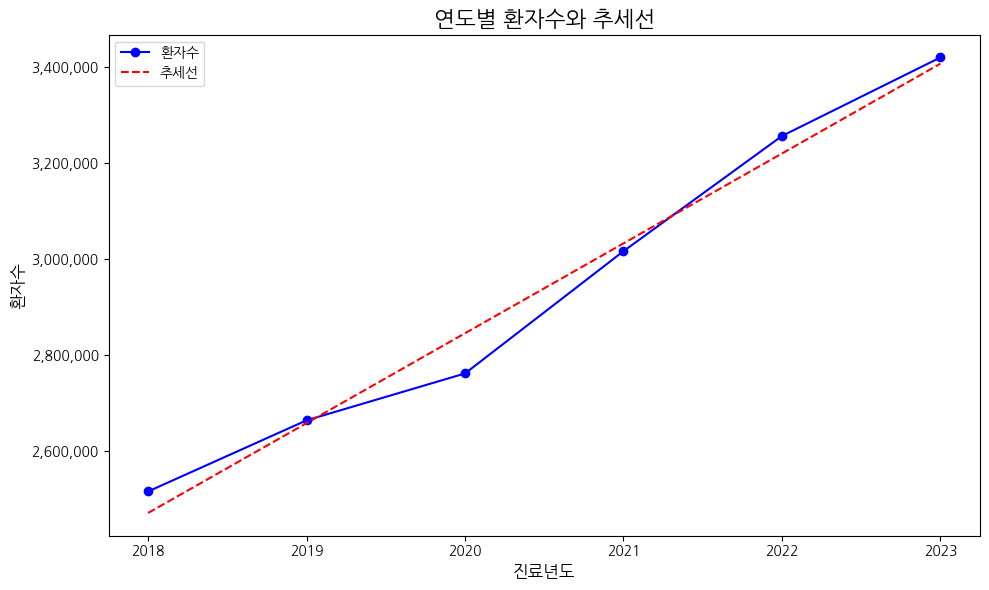

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# 1. 연도별 환자수 집계
yearly_summary = combined_data.groupby('진료년도')['환자수'].sum().reset_index()

# 2. 선 그래프와 추세선
plt.figure(figsize=(10, 6))

# x와 y 값 정의
x = yearly_summary['진료년도'].astype(int)  # 연도
y = yearly_summary['환자수']  # 환자 수

# 실제 데이터 선 그래프
plt.plot(x, y, marker='o', label='환자수', color='blue')

# 추세선 (1차 회귀)
z = np.polyfit(x, y, 1)  # 1차 다항식 회귀
p = np.poly1d(z)
plt.plot(x, p(x), linestyle='--', color='red', label='추세선')

# Y축 숫자 포맷 함수 정의
def format_y(value, tick_number):
    return f"{int(value):,}"  # 천 단위 콤마 추가

# Y축 숫자 포맷 적용
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(format_y))

# 그래프 설정
plt.title('연도별 환자수와 추세선', fontsize=16)
plt.xlabel('진료년도', fontsize=12)
plt.ylabel('환자수', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()



###- 결과: 연도별 환자수와 추세선을 보면 환자 수가 꾸준히 증가하는 추세를 보입니다.
###- 추가 인사이트: 사회적 인식 개선으로 인해 정신질환에 대한 낙인이 줄어들면서 진료받는 환자 수가 증가했을 가능성이 있습니다. 또한, 코로나19 팬데믹 이후 정신건강 문제에 대한 관심 증가도 주요 요인일 수 있습니다.

##- 성별 환자수 비율 분석

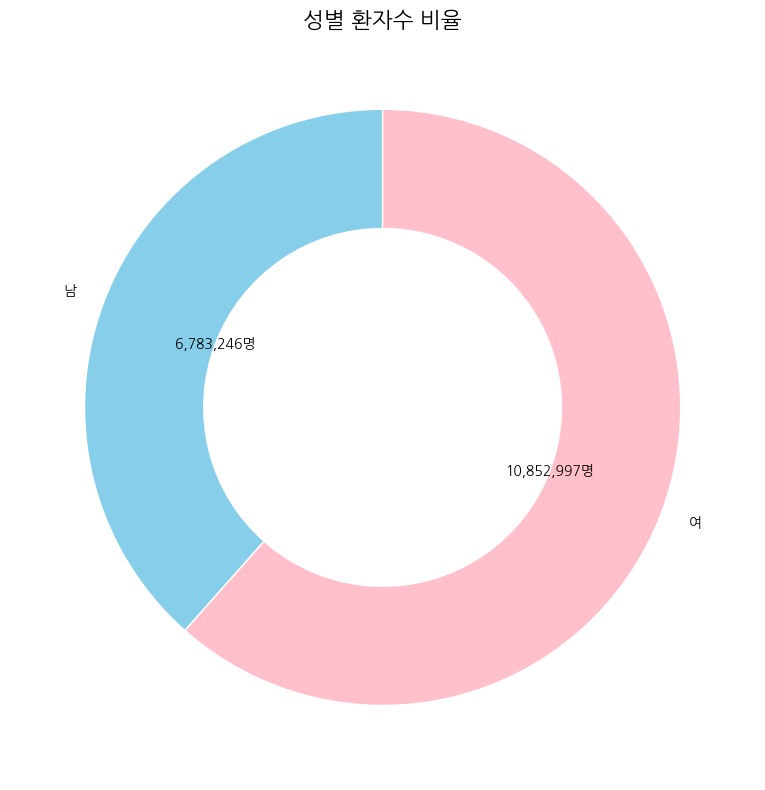

In [ ]:
# 성별별 환자수 합계
gender_total = combined_data.groupby('성별')['환자수'].sum()

# 도넛 차트
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    gender_total,
    labels=gender_total.index,
    autopct=lambda pct: f'{int(pct * sum(gender_total) / 100):,}명',  # 실제 환자수 표시
    startangle=90,
    colors=['skyblue', 'pink'],
    wedgeprops=dict(width=0.4, edgecolor='w')
)

plt.title('성별 환자수 비율', fontsize=16)
plt.tight_layout()
plt.show()



###- 결과: 성별 환자수 비율을 보면 여성이 남성보다 더 많은 비율을 차지하고 있습니다.
###- 추가 인사이트: 여성의 경우 우울증, 불안장애 등의 질환에서 높은 비율을 보이며, 이는 여성의 정신건강에 대한 관심과 진단률이 상대적으로 높기 때문일 가능성이 있습니다.

##- 질환별 성별 환자수 분석

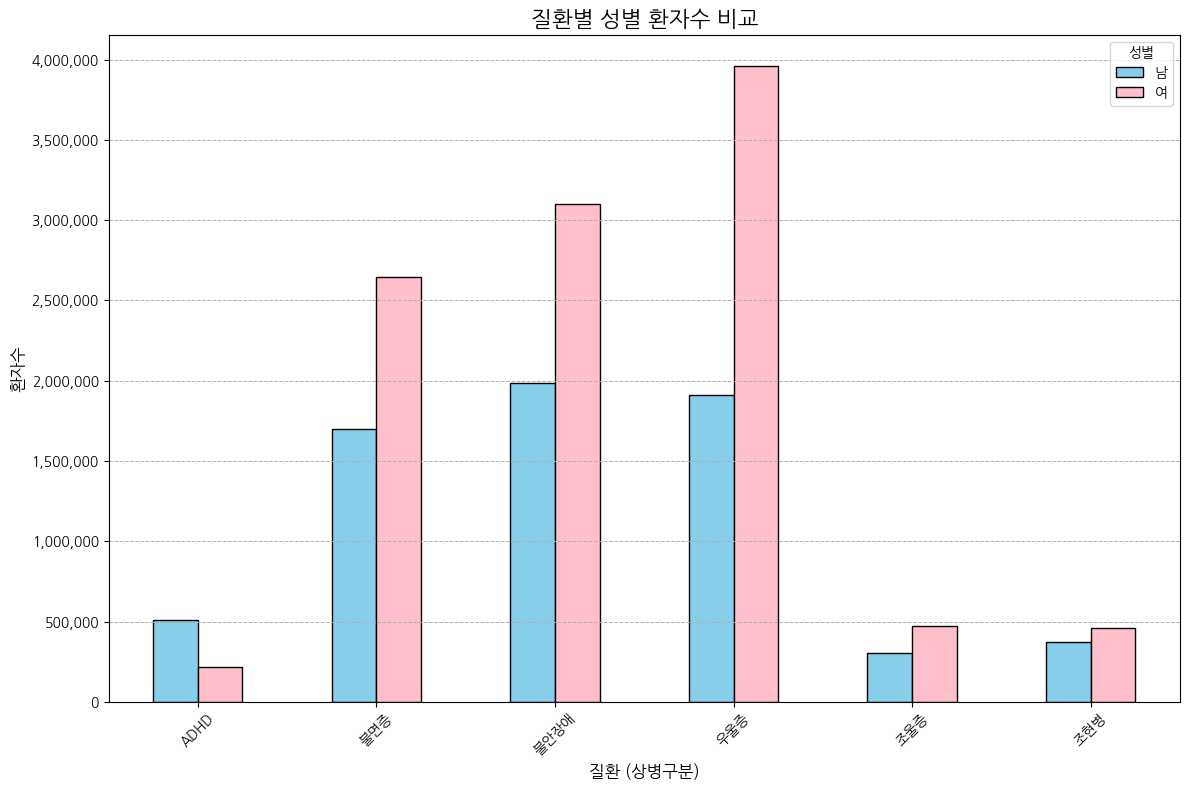

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 질환별-성별 환자수 합계
disease_gender = combined_data.groupby(['상별구분', '성별'])['환자수'].sum().unstack()

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 8))
disease_gender.plot(kind='bar', color=['skyblue', 'pink'], edgecolor='black', ax=ax)

# Y축 숫자 포맷 함수 정의
def format_y(value, tick_number):
    return f"{int(value):,}"

# Y축 숫자 포맷 적용
ax.yaxis.set_major_formatter(FuncFormatter(format_y))

# 그래프 설정
plt.title('질환별 성별 환자수 비교', fontsize=16)
plt.xlabel('질환 (상병구분)', fontsize=12)
plt.ylabel('환자수', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='성별', loc='upper right')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

plt.show()


###- 결과: 불면증, 불안장애, 우울증, 조울증, 조현병 등의 질환은 여성 환자 비율이 높습니다. 반면, ADHD는 남성 환자 비율이 더 높게 나타납니다.


##- 연령대별 환자수 분석

<ipython-input-42-e83a90014f04>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_total = combined_data.groupby('연령구분')['환자수'].sum()


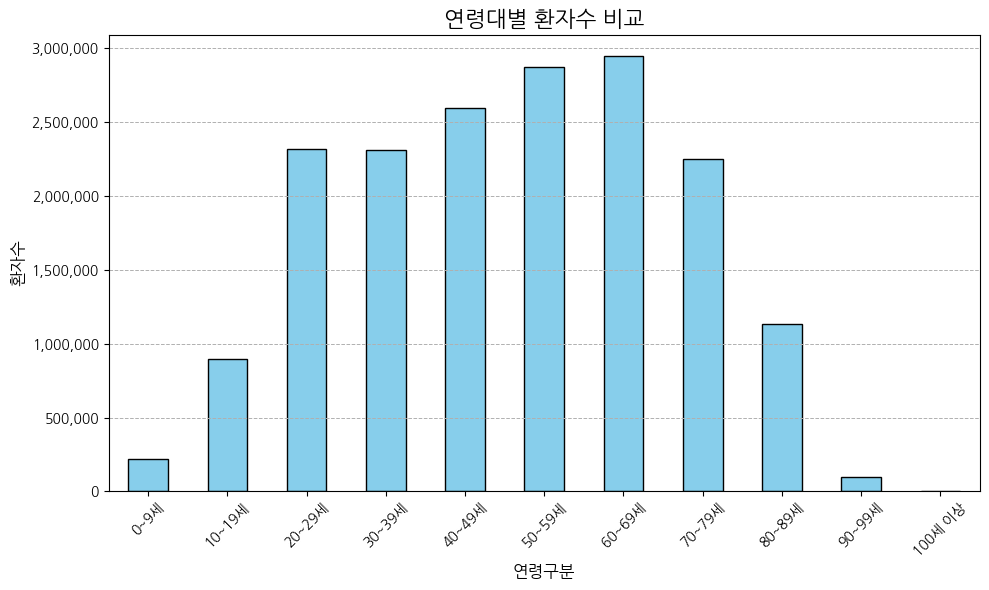

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 연령구분 정렬을 위한 사전 정의
age_order = [
    '0~9세', '10~19세', '20~29세', '30~39세', '40~49세', '50~59세',
    '60~69세', '70~79세', '80~89세', '90~99세', '100세 이상'
]

# 연령구분 열을 Categorical 타입으로 변환하여 정렬 순서 지정
combined_data['연령구분'] = pd.Categorical(combined_data['연령구분'], categories=age_order, ordered=True)

# 연령구분별 환자수 합계 다시 계산
age_group_total = combined_data.groupby('연령구분')['환자수'].sum()

# 그래프 생성
fig, ax = plt.subplots(figsize=(10, 6))
age_group_total.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)

# Y축 숫자 포맷 함수 정의
def format_y(value, tick_number):
    return f"{int(value):,}"

# Y축 숫자 포맷 적용
ax.yaxis.set_major_formatter(FuncFormatter(format_y))

# 그래프 설정
plt.title('연령대별 환자수 비교', fontsize=16)
plt.xlabel('연령구분', fontsize=12)
plt.ylabel('환자수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

plt.show()



###- 결과: 연령대별 환자수 비교 결과, 중장년층(40~59세)의 환자 비율이 가장 높게 나타납니다.
###- 추가 인사이트: 중장년층은 직장 및 가정 내 스트레스, 경제적 부담 등으로 인해 정신질환 발생률이 높아질 가능성이 있습니다.

##- 연령대별 특정 질환의 발생률 분석

<ipython-input-43-64f267e75ff0>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_disease_data = combined_data.groupby(['연령구분', '상별구분'])['환자수'].sum().unstack().fillna(0)


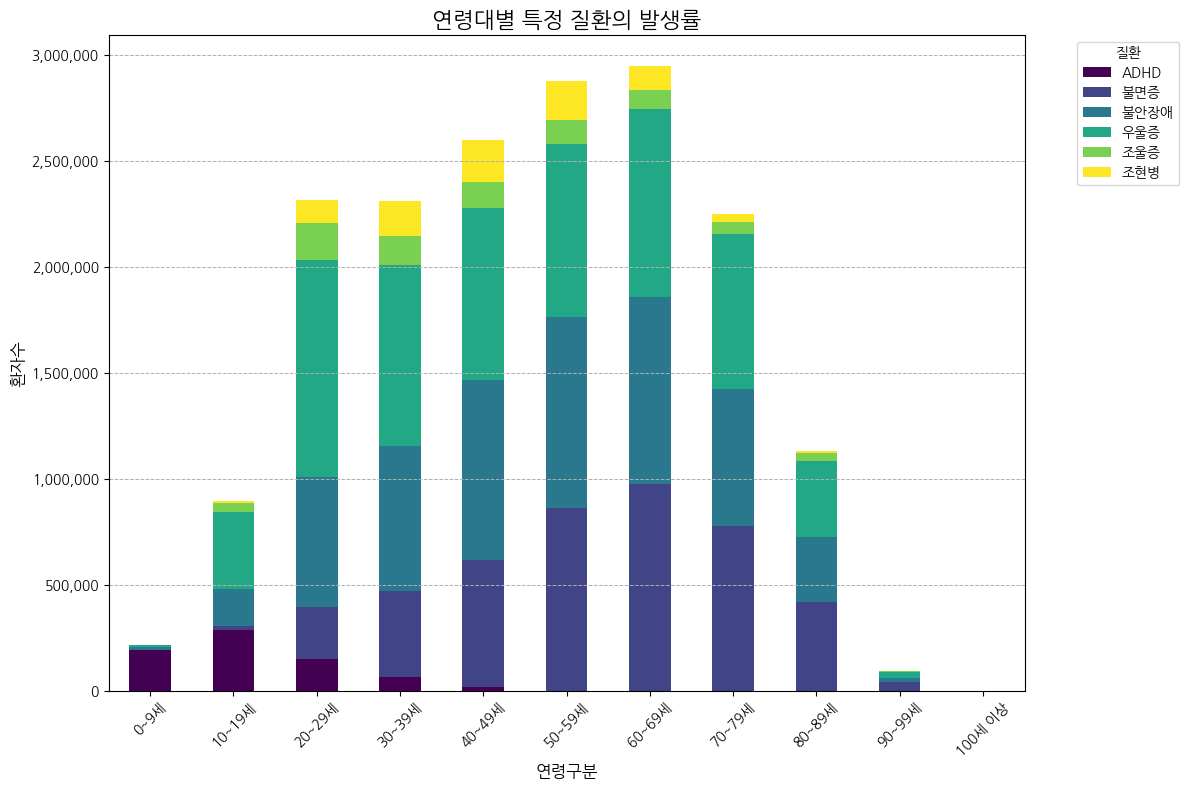

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 연령구분 정렬을 위한 사전 정의
age_order = [
    '0~9세', '10~19세', '20~29세', '30~39세', '40~49세', '50~59세',
    '60~69세', '70~79세', '80~89세', '90~99세', '100세 이상'
]

# 연령구분 열을 Categorical 타입으로 변환하여 정렬 순서 지정
combined_data['연령구분'] = pd.Categorical(combined_data['연령구분'], categories=age_order, ordered=True)

# 연령대별-질환별 환자수 합계
age_disease_data = combined_data.groupby(['연령구분', '상별구분'])['환자수'].sum().unstack().fillna(0)

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 8))
age_disease_data.plot(kind='bar', stacked=True, colormap='viridis', ax=ax)

# Y축 숫자 포맷 함수 정의
def format_y(value, tick_number):
    return f"{int(value):,}"

# Y축 숫자 포맷 적용
ax.yaxis.set_major_formatter(FuncFormatter(format_y))

# 그래프 설정
plt.title('연령대별 특정 질환의 발생률', fontsize=16)
plt.xlabel('연령구분', fontsize=12)
plt.ylabel('환자수', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='질환', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

plt.show()



###- 결론:
ADHD는 성인이 되면서 환자 수가 크게 감소하는 경향을 보입니다.
우울증은 20대에서 가장 높은 비율을 기록하며, 이는 사회 진입기의 스트레스와 관련이 있을 수 있습니다.

##- 지역별 차이 분석

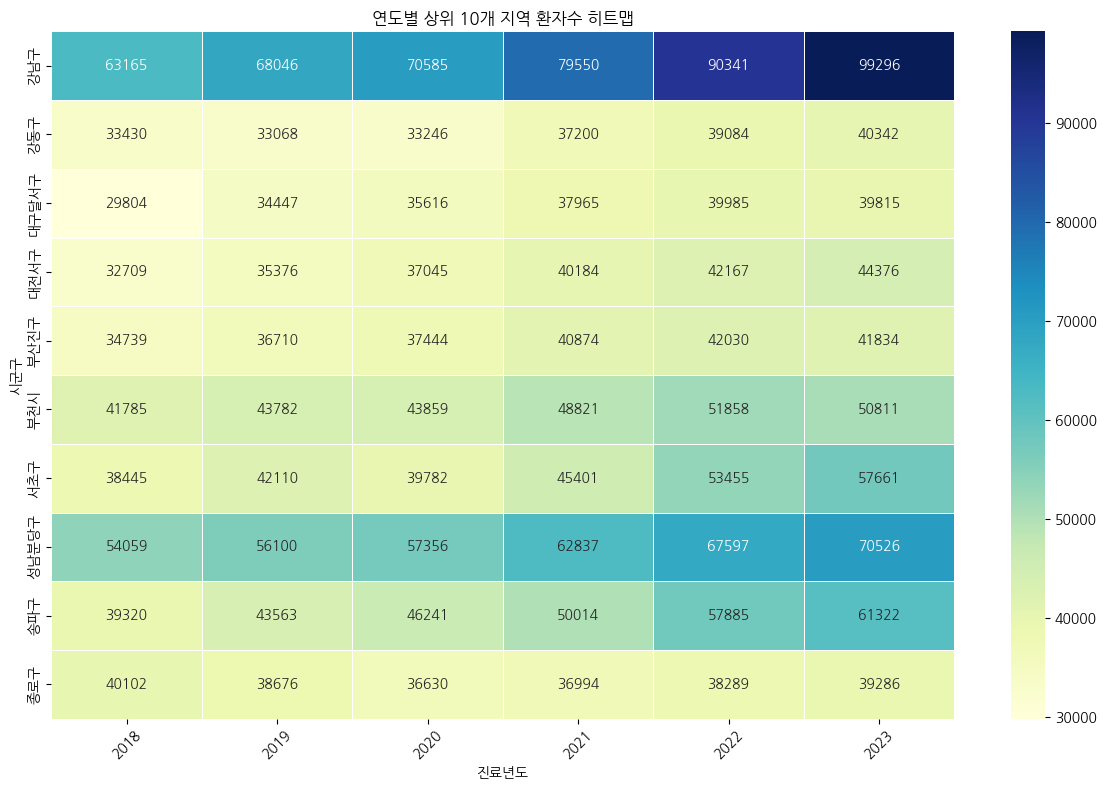

환자수가 가장 많은 지역은 '강남구'로, 총 470,983명입니다.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 환자수가 많은 상위 10개 지역
top_regions = combined_data.groupby('시군구')['환자수'].sum().nlargest(10).index
filtered_data = combined_data[combined_data['시군구'].isin(top_regions)]

# 2. 연도별-지역별 환자수 피벗 테이블
region_year_data = filtered_data.pivot_table(index='시군구', columns='진료년도', values='환자수', aggfunc='sum').fillna(0)

# 3. 연도별 환자수 변화 히트맵
plt.figure(figsize=(12, 8))
ax = sns.heatmap(region_year_data, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=0.5)

# X축 레이블 회전
plt.xticks(rotation=45)

# 제목 및 축 레이블 설정
plt.title('연도별 상위 10개 지역 환자수 히트맵')
plt.xlabel('진료년도')
plt.ylabel('시군구')

plt.tight_layout()
plt.show()

# 환자수가 가장 많은 지역 출력
most_patients_region = region_year_data.sum(axis=1).idxmax()
most_patients_count = region_year_data.sum(axis=1).max()
print(f"환자수가 가장 많은 지역은 '{most_patients_region}'로, 총 {most_patients_count:,}명입니다.")



###- 결과: 환자 수가 가장 많은 지역은 강남구로, 총 470,983명을 기록했습니다.
###- 추가 인사이트: 강남구는 높은 인구 밀도와 의료 접근성이 우수한 지역으로, 진단 및 치료를 받는 환자 수가 많을 가능성이 높습니다.

##- 시도별 가장 많은 질환과 환자수 분석

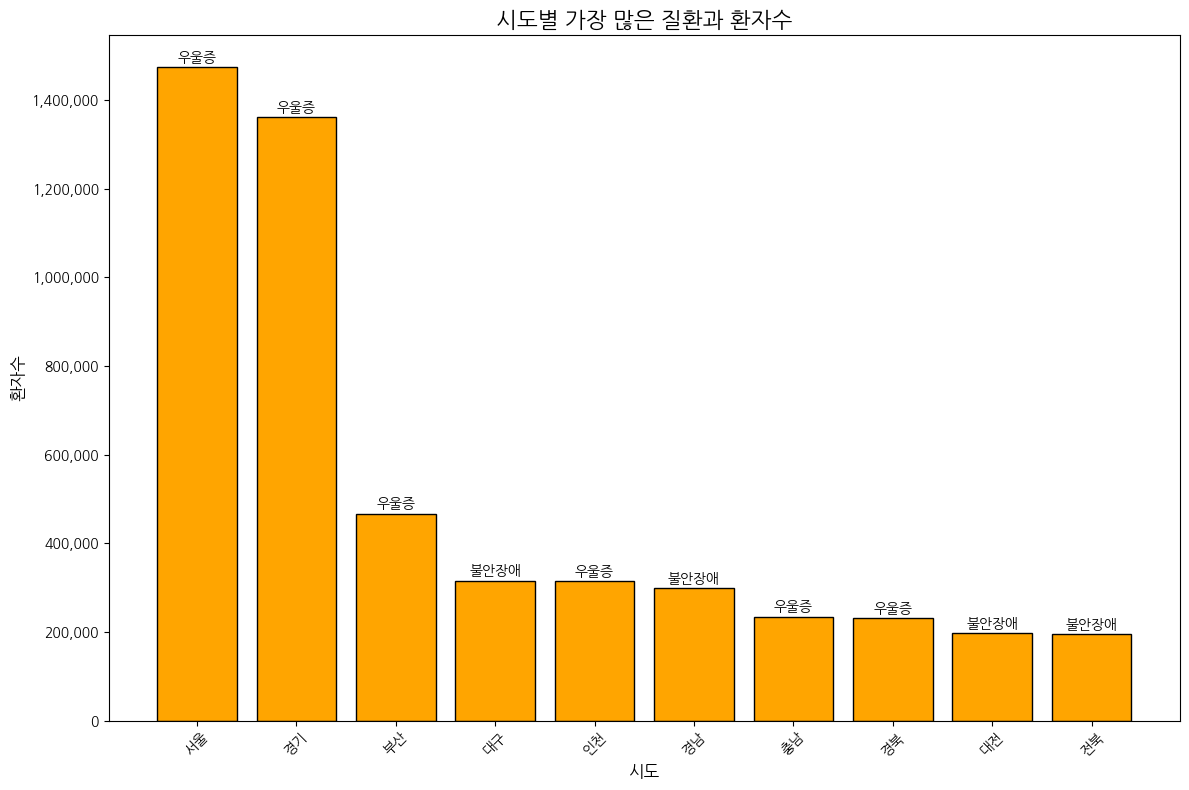

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 시도별 상병구분별 환자수 집계
region_disease_data = combined_data.groupby(['시도', '상별구분'])['환자수'].sum().unstack()

# 각 시도별로 가장 많은 환자수를 차지한 질환 및 해당 환자수 추출
region_top_disease = region_disease_data.idxmax(axis=1)
region_top_disease_count = region_disease_data.max(axis=1)

# 데이터프레임 생성
region_disease_summary = pd.DataFrame({
    '최다 질환': region_top_disease,
    '환자수': region_top_disease_count
}).sort_values(by='환자수', ascending=False)

# 상위 10개 시도 추출
top_region_disease_summary = region_disease_summary.head(10)

# 막대 그래프 생성
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(
    top_region_disease_summary.index,
    top_region_disease_summary['환자수'],
    color='orange',
    edgecolor='black'
)

# Y축 숫자 포맷 함수 정의
def format_y(value, tick_number):
    return f"{int(value):,}"

# Y축 숫자 포맷 적용
ax.yaxis.set_major_formatter(FuncFormatter(format_y))

# 각 막대 위에 질환 이름 추가
for bar, disease in zip(bars, top_region_disease_summary['최다 질환']):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 5000,  # 텍스트 위치 (막대 위)
        disease,
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# 제목 및 레이블 설정
plt.title('시도별 가장 많은 질환과 환자수', fontsize=16)
plt.xlabel('시도', fontsize=12)
plt.ylabel('환자수', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



###- 결과: 대구, 경남, 대전, 전북 지역에서는 불안장애 환자가 가장 많습니다. 그 외 대부분의 지역에서는 우울증 환자가 가장 높은 비율을 차지합니다.
###- 추가 인사이트: 지역별 경제적, 사회적 환경의 차이가 특정 질환 발생률에 영향을 미쳤을 가능성이 있습니다.

##- 질환별 환자수 비율 분석

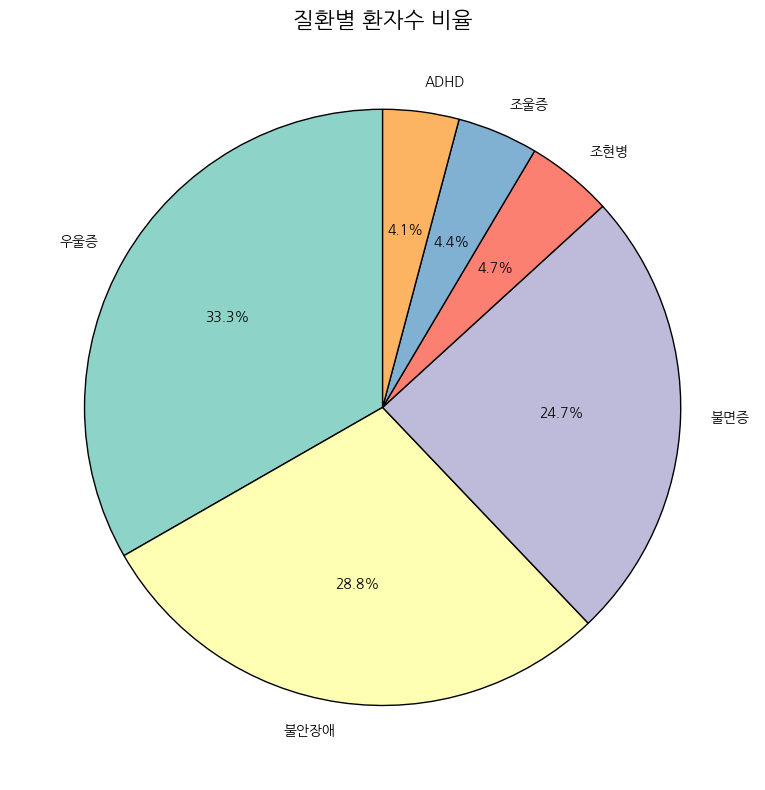

In [ ]:
# 질환별 환자수 합계
disease_total = combined_data.groupby('상별구분')['환자수'].sum().sort_values(ascending=False)

# 파이 차트 생성
plt.figure(figsize=(10, 8))
plt.pie(
    disease_total,
    labels=disease_total.index,
    autopct='%1.1f%%',  # 퍼센트 표시
    startangle=90,  # 시작 각도
    colors=plt.cm.Set3.colors,  # 색상 설정
    wedgeprops={'edgecolor': 'black'}  # 경계선 추가
)

# 제목 추가
plt.title('질환별 환자수 비율', fontsize=16)
plt.tight_layout()
plt.show()



###- 결과: 우울증, 불안장애, 불면증 환자가 전체 환자 수의 높은 비율을 차지합니다.
###- 추가 인사이트: 이들 질환은 현대인의 삶에서 스트레스와 밀접하게 관련되어 있으며, 사회 전반에서의 예방 및 치료 대책이 필요합니다.

---
#사회적 인식과 변화에 대한 추가적인 분석



###- 네이버 검색트렌드를 활용한 분석

1. 데이터 탐색 및 전처리

In [ ]:
import pandas as pd

# 파일 경로를 지정하세요
file_path = "/content/datalab_2018.xlsx"

# 파일 불러오기 (첫 7행은 메타데이터로 스킵)
data = pd.read_excel(file_path)
data.head(10)



,url,http://datalab.naver.com/keyword/trendResult.naver?hashKey=N_313f152aad2e0be5c6c031f3dba8e537,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,주제,통검,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,범위,합계,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,기간,일간 : 2018-01-01 ~ 2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,성별,"전체(여성,남성)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,연령대,전체,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,날짜,우울증,날짜,불안장애,날짜,ADHD,날짜,조현병,날짜,불면증
6,2018-01-01,0.19408,2018-01-01,0.03146,2018-01-01,0.0484,2018-01-01,0.0635,2018-01-01,0.0818
7,2018-01-02,0.22669,2018-01-02,0.03697,2018-01-02,0.06439,2018-01-02,0.11243,2018-01-02,0.11909
8,2018-01-03,0.18988,2018-01-03,0.03408,2018-01-03,0.05988,2018-01-03,0.11604,2018-01-03,0.11961
9,2018-01-04,0.16518,2018-01-04,0.03246,2018-01-04,0.056,2018-01-04,0.30871,2018-01-04,0.12108


- 0~4까지의 행은 필요업는 데이터임으로 삭제가 필요.
- 인덱스 재설정.
- 날짜 열이 중복되어 있기 때문에 중복되 날짜열은 제거해야 함.

In [ ]:
import pandas as pd

file_path = "/content/datalab_2018.xlsx"

# 파일 불러오기 (전체 데이터)
data = pd.read_excel(file_path)

# 1. 필요 없는 행(0~4행) 삭제
data_cleaned = data.iloc[5:, :].reset_index(drop=True)

# 2. 첫 번째 행을 컬럼 이름으로 설정
data_cleaned.columns = data_cleaned.iloc[0]
data_cleaned = data_cleaned[1:].reset_index(drop=True)

# 3. 첫 번째 열의 이름을 '날짜'로 설정
data_cleaned = data_cleaned.rename(columns={data_cleaned.columns[0]: "날짜"})  # 첫 열 이름 변경

# 4. 중복된 날짜 열 제거 (첫 번째 열 제외)
data_cleaned = data_cleaned.loc[:, ~data_cleaned.columns.duplicated()]

# 5. '날짜' 열의 데이터 타입 변환
data_cleaned['날짜'] = pd.to_datetime(data_cleaned['날짜'], errors='coerce')

# 결과 확인
print("데이터 크기:", data_cleaned.shape)
print("\n데이터 컬럼 정보:")
print(data_cleaned.info())
print("\n데이터 미리보기:")
print(data_cleaned.head())


데이터 크기: (366, 6)

데이터 컬럼 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      366 non-null    datetime64[ns]
 1   우울증     366 non-null    object        
 2   불안장애    366 non-null    object        
 3   ADHD    366 non-null    object        
 4   조현병     366 non-null    object        
 5   불면증     366 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 17.3+ KB
None

데이터 미리보기:
0         날짜      우울증     불안장애     ADHD      조현병      불면증
0 2018-01-01  0.19408  0.03146   0.0484   0.0635   0.0818
1 2018-01-02  0.22669  0.03697  0.06439  0.11243  0.11909
2 2018-01-03  0.18988  0.03408  0.05988  0.11604  0.11961
3 2018-01-04  0.16518  0.03246    0.056  0.30871  0.12108
4 2018-01-05  0.16508   0.0335  0.05228  6.81978  0.11521


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


2018년 질병별 평균 검색량:
0
우울증     0.126381
불안장애    0.031813
ADHD    0.099179
조현병     1.035485
불면증     0.087695
dtype: float64


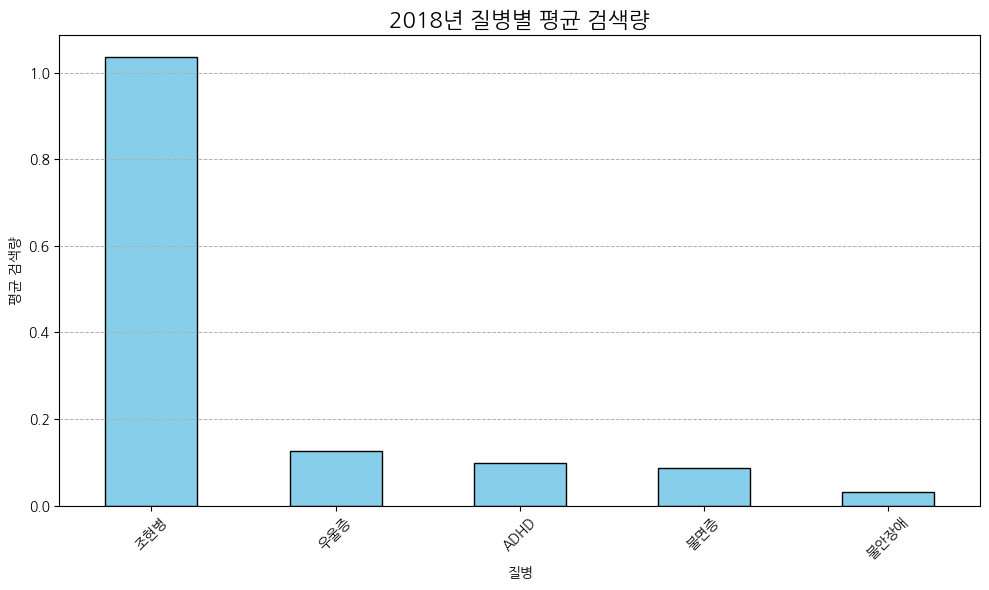

In [ ]:
# 1. 질병별 검색량 열만 선택
disease_columns = [col for col in data_cleaned.columns if col != "날짜"]  # '날짜' 제외

# 2. 질병별 검색량 데이터를 숫자(float)로 변환
for col in disease_columns:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')  # 숫자로 변환, 변환 실패 시 NaN 처리

# 3. 질병별 검색량 평균 계산
average_search = data_cleaned[disease_columns].mean()

# 4. 결과 출력
print("2018년 질병별 평균 검색량:")
print(average_search)

# 시각화 (선택적)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
average_search.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("2018년 질병별 평균 검색량", fontsize=16)
plt.ylabel("평균 검색량")
plt.xlabel("질병")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


##연도별로 나누어져있는 데이터를 불러와 전처리 후 연도별 검색량 추세 분석

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default sty

연도별 검색량 합계 (2023년까지):
        10.79005  2023-01-01.1     4.79151  2023-01-01.2    10.16093  \
연도                                                                     
2018     0.00000           0.0     0.00000           0.0     0.00000   
2019     0.00000           0.0     0.00000           0.0     0.00000   
2020     0.00000           0.0     0.00000           0.0     0.00000   
2021     0.00000           0.0     0.00000           0.0     0.00000   
2022     0.00000           0.0     0.00000           0.0     0.00000   
2023  5393.95574           0.0  2483.73634           0.0  7717.08666   

      2023-01-01.3    13.18215  2023-01-01.4     7.11046   0.19408  ...  \
연도                                                                  ...   
2018           0.0     0.00000           0.0     0.00000  45.74305  ...   
2019           0.0     0.00000           0.0     0.00000   0.09145  ...   
2020           0.0     0.00000           0.0     0.00000   0.00000  ...   
2021           0.0     0.0

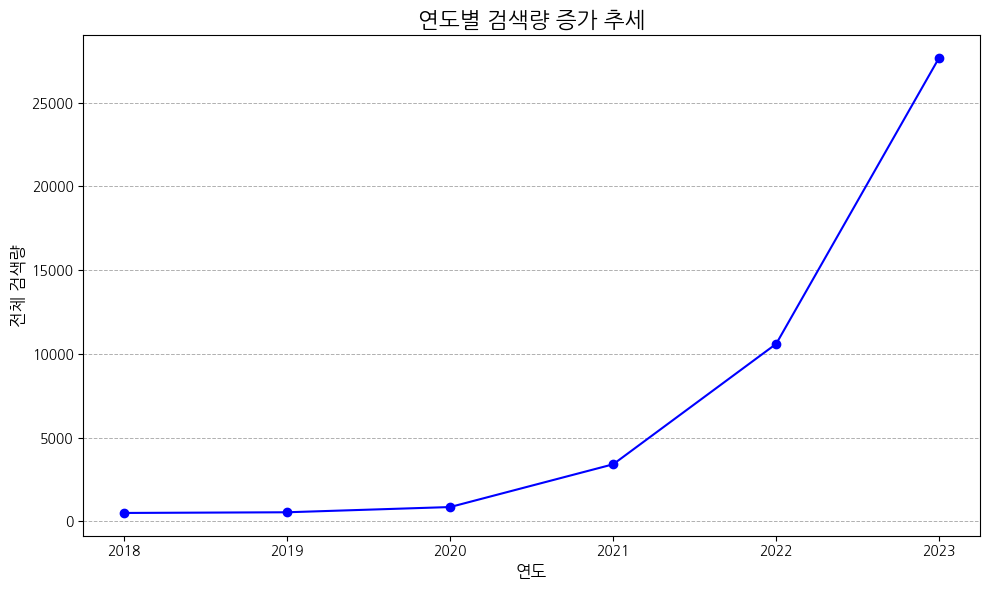

In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# datalab_으로 시작하는 파일 경로 불러오기
file_paths = glob.glob("/content/datalab_*.xlsx")

# 모든 파일을 처리 및 병합
dataframes = []
for file_path in file_paths:
    # 파일 불러오기
    data = pd.read_excel(file_path, skiprows=7)

    # 1. 첫 번째 열 이름을 '날짜'로 설정
    data = data.rename(columns={data.columns[0]: "날짜"})

    # 2. 중복된 날짜 열 제거 (첫 번째 열 제외)
    data = data.loc[:, ~data.columns.duplicated()]

    # 3. 필요 없는 행 삭제 (날짜 이후의 데이터만 유지)
    data = data.iloc[1:].reset_index(drop=True)

    # 4. 날짜 열 변환
    data['날짜'] = pd.to_datetime(data['날짜'], errors='coerce')

    # 5. 검색량 데이터를 숫자로 변환
    for col in data.columns[1:]:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    # 데이터프레임에 추가
    dataframes.append(data)

# 모든 데이터를 하나로 병합
combined_data = pd.concat(dataframes, ignore_index=True)

# 날짜별 데이터 정렬
combined_data = combined_data.sort_values("날짜").reset_index(drop=True)

# 연도별 검색량 합계 계산
combined_data['연도'] = combined_data['날짜'].dt.year
search_columns = [col for col in combined_data.columns if col not in ["날짜", "연도"]]
yearly_search_trends = combined_data.groupby('연도')[search_columns].sum()

# 연도별 전체 검색량 합계 계산
yearly_search_trends['전체 검색량'] = yearly_search_trends.sum(axis=1)

# 2023년까지만 데이터 필터링
yearly_search_trends = yearly_search_trends[yearly_search_trends.index <= 2023]

# 결과 출력
print("연도별 검색량 합계 (2023년까지):")
print(yearly_search_trends)

# 시각화: 연도별 검색량 추세 (2023년까지)
plt.figure(figsize=(10, 6))
plt.plot(yearly_search_trends.index, yearly_search_trends['전체 검색량'], marker='o', color='blue')
plt.title("연도별 검색량 증가 추세", fontsize=16)
plt.xlabel("연도", fontsize=12)
plt.ylabel("전체 검색량", fontsize=12)
plt.grid(axis="y", linestyle="--", linewidth=0.7)
plt.tight_layout()
plt.show()


###- 결과: 정신질환에 관련한 키워드 전체 검색량이 증가 하는 추세를 보인다. 이는 사람들이 정신질환을 숨기지 않고, 이를 자연스러운 건강 문제로 받아들이는 분위기가 형성되면서 검색량도 증가했을 가능성이 있다.

###연도별 환자수 의 추세선과 종합하여 분석

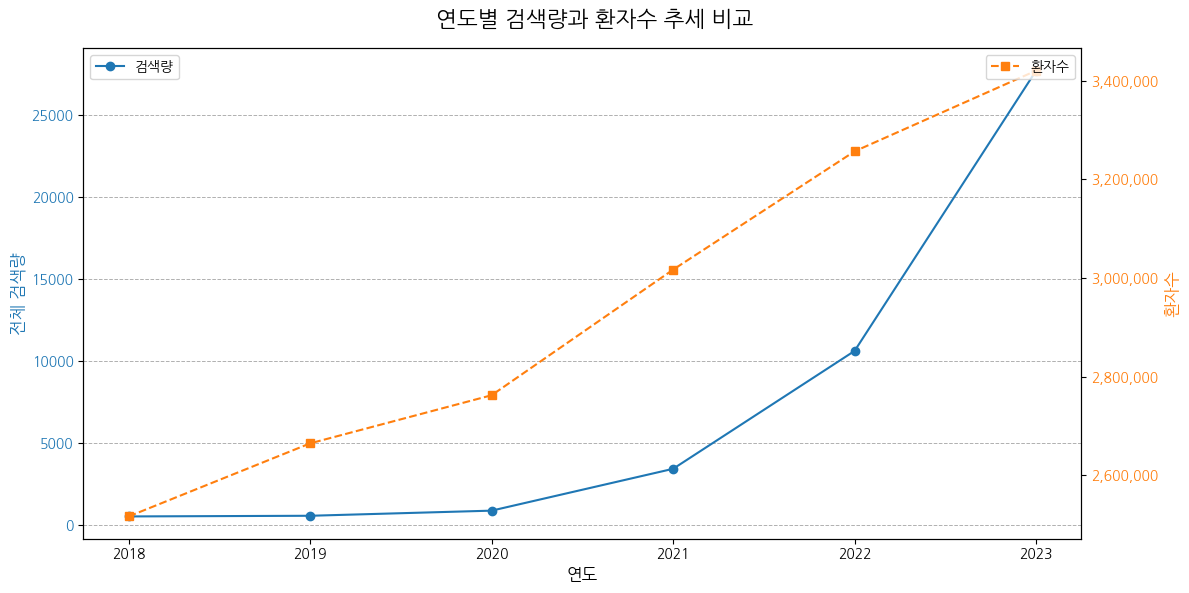

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 Y축: 연도별 검색량
color = 'tab:blue'
ax1.set_xlabel('연도', fontsize=12)
ax1.set_ylabel('전체 검색량', color=color, fontsize=12)
ax1.plot(
    yearly_search_trends.index,
    yearly_search_trends['전체 검색량'],
    marker='o',
    label='검색량',
    color=color
)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(axis='y', linestyle="--", linewidth=0.7)

# 두 번째 Y축: 연도별 환자수
ax2 = ax1.twinx()  # 두 번째 Y축 생성
color = 'tab:orange'
ax2.set_ylabel('환자수', color=color, fontsize=12)
ax2.plot(
    yearly_summary['진료년도'],
    yearly_summary['환자수'],
    marker='s',
    linestyle='--',
    label='환자수',
    color=color
)
ax2.tick_params(axis='y', labelcolor=color)

# Y축 숫자 포맷 적용 (천 단위 콤마)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))

# 제목 및 범례 설정
fig.suptitle("연도별 검색량과 환자수 추세 비교", fontsize=16)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()


##결론

- 이러한 결과는 정신건강 문제에 대한 대중의 관심 증가, 의료 접근성 향상과 언론(유튜브,기사 등등)의 홍보등이 영향을 보여준것이 아닐까 싶다.

- 그러나 환자 수가 꾸준히 증가하는 것은 사회적 스트레스나 현대 생활방식의 영향을 반영할 가능성이 있으므로, 예방적 접근이 강화되어야 한다.